In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
%%R
set.seed(1)
x1 <- runif(100)
x2 <- 0.5 * x1 + rnorm(100)/10
y <- 2 + 2 * x1 + .3 * x2 + rnorm(100)

#Chapter 3
##14
###a) 

The form of the linear model is: $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$

Where $\beta_0 = 2, \beta_1 = 2, \beta_2 = .3$

###b)

[1] "The correlation between x1 and x2 is 0.84"


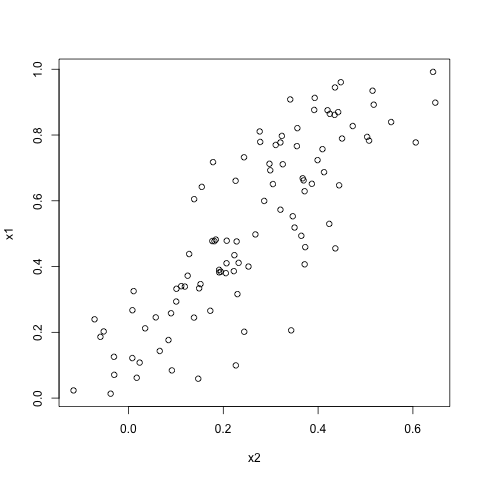

In [4]:
%%R
plot(x1~x2)
sprintf("The correlation between x1 and x2 is %.2f", cor(x1, x2))

###c)

In [5]:
%%R
fit1 <- lm(y~x1 + x2)
summary(fit1)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05



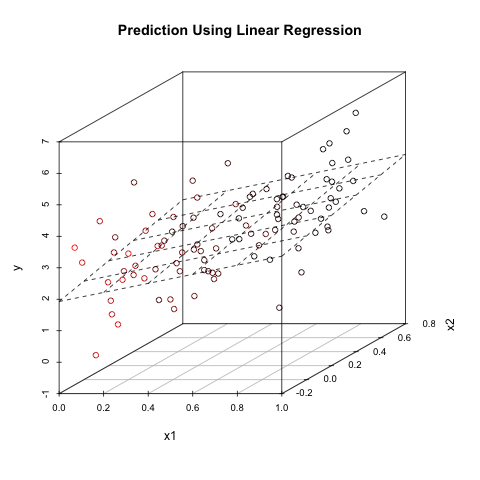

In [6]:
%%R
library(scatterplot3d)
s3d <- scatterplot3d(x1, x2, y, main="Prediction Using Linear Regression", highlight.3d=TRUE)
s3d$plane3d(fit1)

Based on the summary results above, it seems that although the estimated y-intercept is nearly correct, our slope estimates are pretty bad. $\hat{\beta_1}$ and $\hat{\beta_2}$ are nearly equal. This is what we expect from the readings/lectures, given that there is a very high correlation between the two predictors. This is the problem of high colinearity. The estimated parameters are: $\hat{\beta_0} = 2.1305, \hat{\beta_1} = 1.4396, \hat{\beta_2} = 1.0097$ It seems like we should be able to reject $H_0$ but not $H_1$, judging by the given p values. Whether or not $x_1$ is a perfect surrogate for $x_2$ for prediction is another matter.

###d)

In [7]:
%%R
fit2 <- lm(y~x1)
summary(fit2)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06



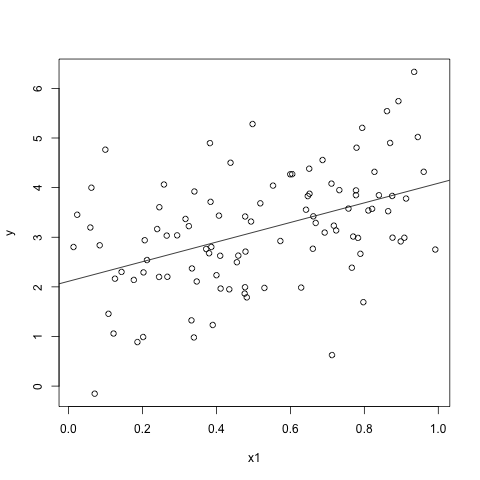

In [8]:
%%R
plot(x1, y)
abline(fit2)

Using just x1, we do seem to be able to predict y fairly well, judging by the p value. Yes, we can reject the null hypothesis $H_0$

###e)

In [9]:
%%R
fit3 <- lm(y ~ x2)
summary(fit3)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05



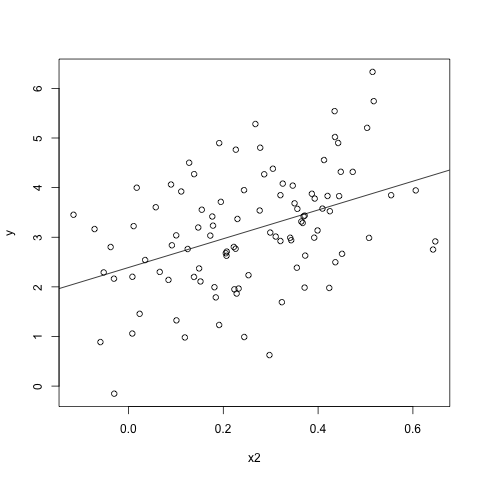

In [10]:
%%R
plot(x2, y)
abline(fit3)

This works well (again because of the high correlation between $x_1$ and $x_2$). Based on this, we can reject the Null hypothesis $H_1$
###f)
No, they don't nessecarily contradict eachother. When we put both predictors in the model, the high correlation causes one coefficient to soak up the other. This is the problem of colinearity.
###g)

In [11]:
%%R
x1 <- c(x1, 0.1)
x2 <- c(x2, 0.8)
y  <- c(y, 6)

In [12]:
%%R
fit4 <- lm(y~x1 + x2)
summary(fit4)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06



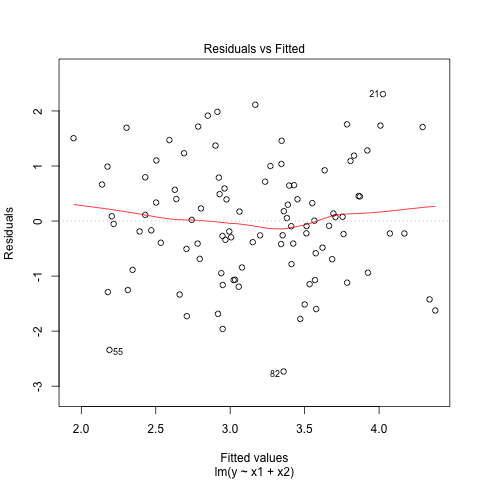

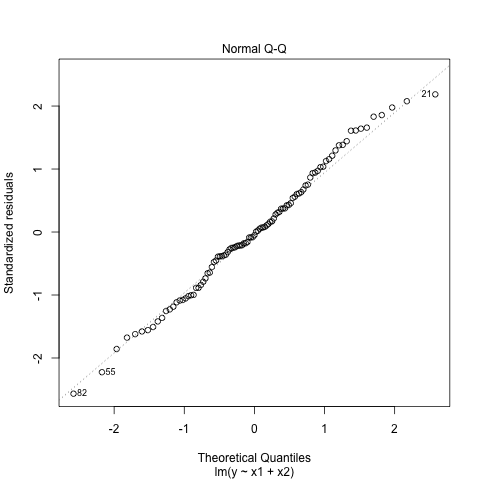

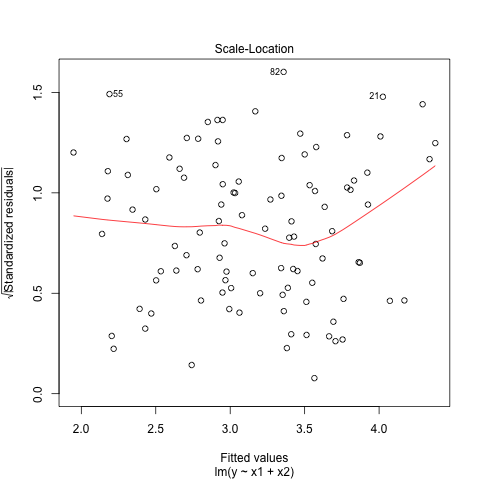

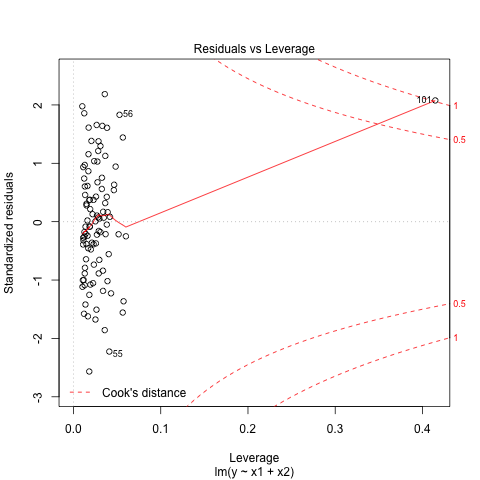

In [13]:
%%R
plot(fit4)

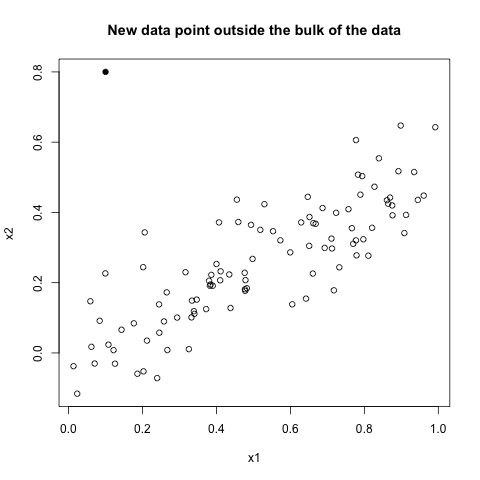

In [14]:
%%R
plot(x1, x2, main="New data point outside the bulk of the data", pch=ifelse(x1==.1, 19, 1))

In the above plots, we show that the added datapoints create a point of high leverage (far from the bulk of the other predictor variables). The Residuals vs. Leverage plot shows that the new point has high leverage and a high residual.

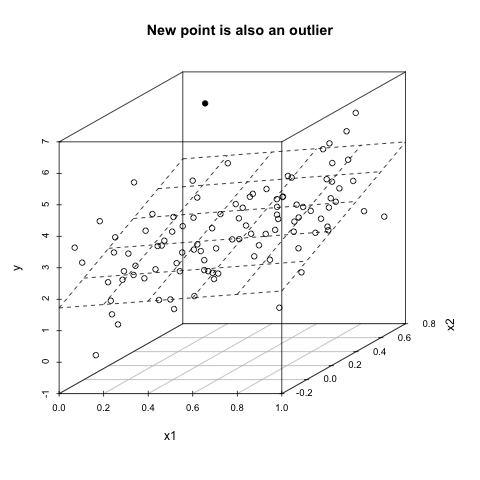

In [15]:
%%R
s3d <- scatterplot3d(x1, x2, y, main="New point is also an outlier", pch=ifelse(x1==.1, 19, 1))
s3d$plane3d(fit4)

In the above plot we see that this point has a very different response from the responses to predictors near it. This is a good indication that this data point is also an outlier.

In [16]:
%%R
fit5 <- lm(y~x1)
summary(fit5)


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05



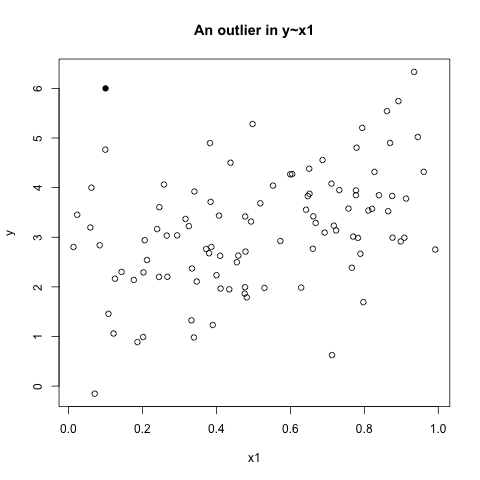

In [17]:
%%R
plot(x1, y, pch=ifelse(x1==.1, 19, 1), main="An outlier in y~x1")

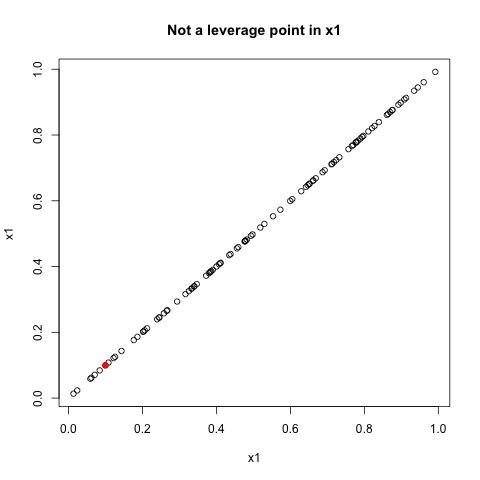

In [18]:
%%R
plot(x1, x1, pch=ifelse(x1==.1, 19, 1), col=ifelse(x1==.1, 'red', 'black'), main="Not a leverage point in x1")

The above plots show that although the new data point in x1 is an outlier, it does not fall far outside of the other data, and is therefore not a high-leverage point.

In [19]:
%%R
fit6 <- lm(y~x2)
summary(fit6)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06



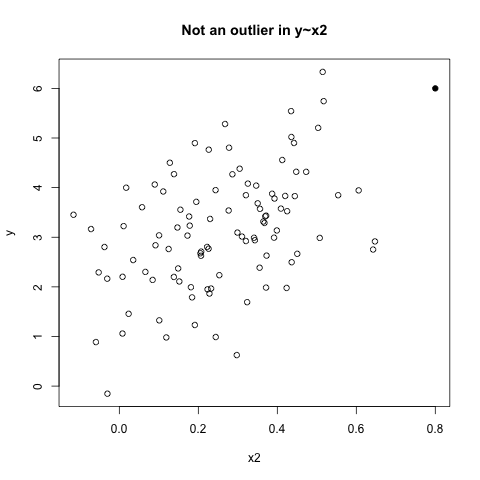

In [20]:
%%R
plot(x2, y, pch=ifelse(x2==.8, 19, 1), main="Not an outlier in y~x2")

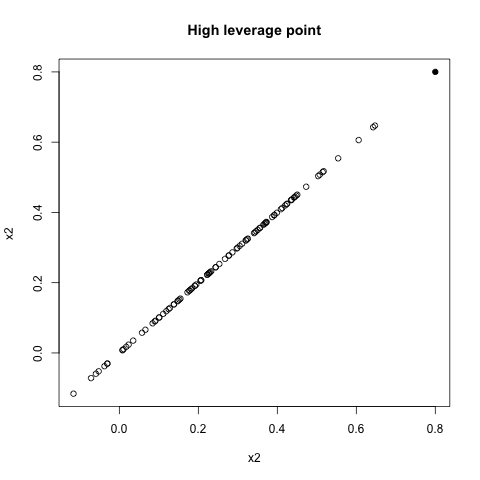

In [21]:
%%R
plot(x2, x2, pch=ifelse(x2==.8, 19, 1), main="High leverage point")

The above plots reveal that the point in $x_2$ is not an outlier (it seems to be a reasonable response to the predictor $x_2=.8$. It is, however, a high leverage point, being far from the other $x_2$ values.

------------

#Chapter 4
##11

In [22]:
%%R
require(ISLR)
attach(Auto)

Loading required package: ISLR


###a)

In [23]:
%%R
mpg01 <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
auto <- data.frame(mpg01)

###b)

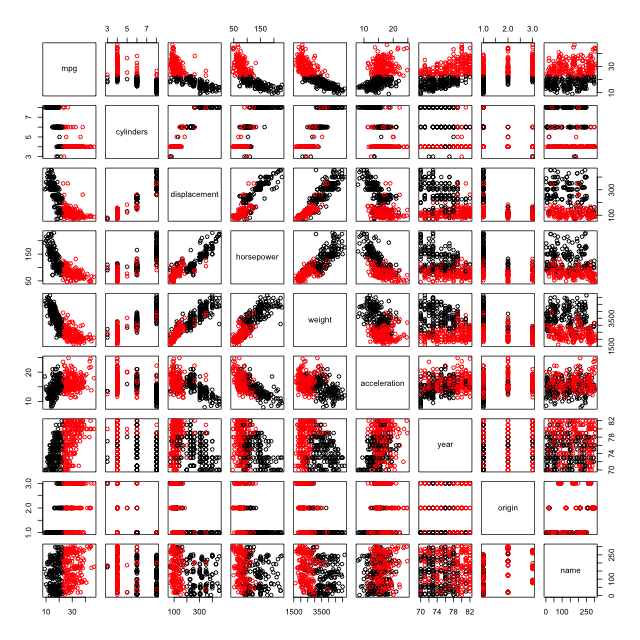

In [24]:
%%R -w 640 -h 640
auto.all <- c(Auto, auto)
pairs(Auto, col=ifelse(auto$mpg01, 'red', 'black'), size=c(15, 15))

The above pair plot leads me to think that the best features for classification might be horsepower and weight, although acceleration and displacement also seem good. Using the class to color the pairs, we can look for good seperation with little crossover, indicating that good seperation with a linear classifier is possible.

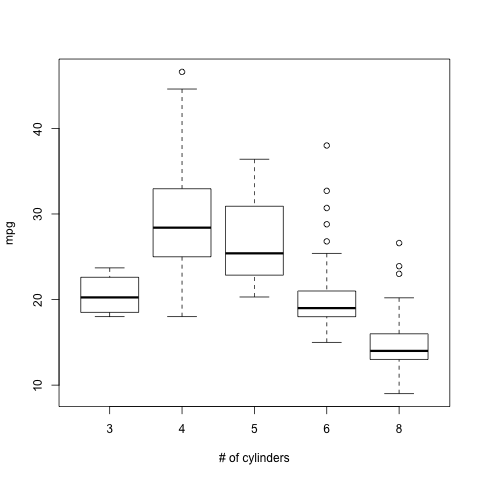

In [25]:
%%R
boxplot(mpg~cylinders, data=Auto, xlab="# of cylinders", ylab="mpg")

The above plot shows that # of cylinders may also be a fairly good predictor of mpg. The boxplot shows that there isn't a lot of crossover between the groups.

###c)

In [26]:
%%R
set.seed(123)
auto <- data.frame(mpg01, cylinders, horsepower, weight)
train.size <- floor(nrow(auto) * .75)
train.ind <- sample(seq_len(nrow(auto)), size=train.size)
auto.train <- auto[train.ind, ]
auto.test <- auto[-train.ind, ]

###d)

Loading required package: MASS


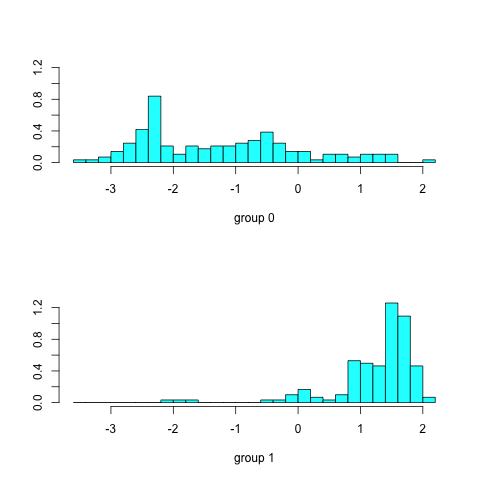

In [102]:
%%R
require(MASS)
lda.fit <- lda(mpg01~cylinders + horsepower + weight, data=auto.train)
plot(lda.fit)

In [103]:
%%R
lda.pred <- predict(lda.fit, auto.test)
table(lda.pred$class, auto.test$mpg01)

   
     0  1
  0 44  3
  1  9 42


In [104]:
%%R
mean(lda.pred$class == auto.test$mpg01)

[1] 0.877551


#### d.2
The prediction accuracy of the lda is $88\%$.
###e)

In [105]:
%%R
qda.fit <- qda(mpg01~cylinders + horsepower + weight, data=auto.train)
qda.pred <- predict(qda.fit, auto.test)
table(qda.pred$class, auto.test$mpg01)

   
     0  1
  0 47  4
  1  6 41


In [106]:
%%R
mean(qda.pred$class==auto.test$mpg01)

[1] 0.8979592


####e.2
The prediction accuracy for qda is $90\%$
###f)

In [32]:
%%R
glm.fit <- glm(mpg01~cylinders + horsepower + weight, data=auto.train, family=binomial)
glm.probs <- predict(glm.fit, auto.test, type="response")
glm.pred <- ifelse(glm.probs > 0.5, 1, 0)
table(glm.pred, auto.test$mpg01)

        
glm.pred  0  1
       0 45  3
       1  8 42


In [33]:
%%R
mean(glm.pred==auto.test$mpg01)

[1] 0.8877551


####f.2
The prediction accuracy for logistic regression is $89\%$
###g)

In [34]:
%%R
require(class)
predictors <- c("cylinders", "horsepower", "weight")
knn.maker <- function(index){
    knn.pred <- knn(auto.train[predictors], auto.test[predictors], auto$mpg01[train.ind], k=index)
    mean(knn.pred == auto$mpg01[train.ind])
}
X <- seq_len(nrow(auto.train))
acc <- sapply(X, knn.maker)

Loading required package: class


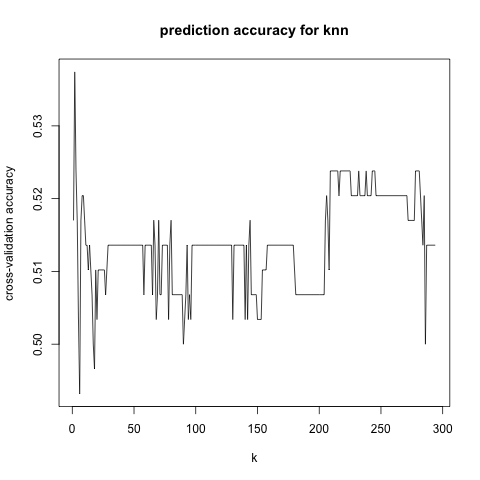

In [35]:
%%R
plot(X, acc, type='l', main='prediction accuracy for knn', xlab="k", ylab="cross-validation accuracy")

In [36]:
%%R
max(acc)

[1] 0.537415


In [37]:
%%R
which.max(acc)

[1] 2


####g.2
The best result is $52\%$ using $k=2$

-------------
#Chapter 5
##5
###a)

In [38]:
%%R
glm.fit2 <- glm(default~balance + income, data=Default, family=binomial)

###b)
####i

In [39]:
%%R
train.size <- floor(nrow(Default) * .75)
train.ind <- sample(seq_len(nrow(Default)), size=train.size)
default.train <- Default[train.ind, ]
default.test <- Default[-train.ind, ]

####ii

In [40]:
%%R
glm.fit3 <- glm(default~balance + income, data=default.train, family=binomial)

####iii

In [41]:
%%R
glm.probs <- predict(glm.fit3, newdata=default.test, type="response")
glm.pred <- ifelse(glm.probs > .5, 'Yes', 'No')

In [42]:
%%R
table(glm.pred, default.test$default)

        
glm.pred   No  Yes
     No  2391   74
     Yes    8   27


####iiii

In [43]:
%%R
mean(glm.pred!=default.test$default)

[1] 0.0328


###c)

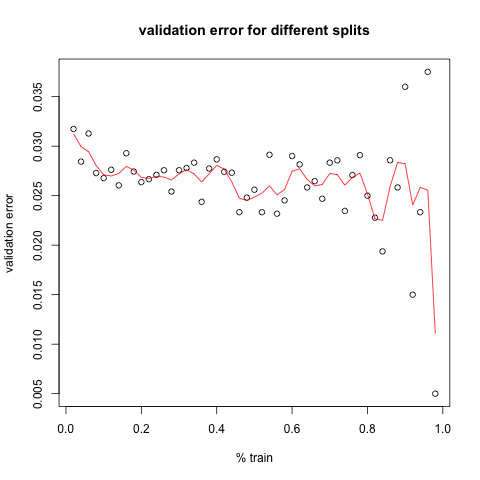

In [44]:
%%R
train.splits <- seq(.02, .98, .02)
set.seed(123)
test.validation <- function(x){
    train.size <- floor(nrow(Default) * x)
    train.ind <- sample(seq_len(nrow(Default)), size=train.size)
    default.train <- Default[train.ind, ]
    default.test <- Default[-train.ind, ]
    glm.fit <- glm(default~balance + income, data=default.train, family=binomial)
    glm.probs <- predict(glm.fit, newdata=default.test, type="response")
    glm.pred <- ifelse(glm.probs > .5, 'Yes', 'No')
    mean(glm.pred!=default.test$default)
}

err.wo.student <- sapply(train.splits, test.validation)
lo.wo.student <- smooth.spline(train.splits, err.wo.student, spar=0.36)
plot(train.splits, err.wo.student, main="validation error for different splits", xlab="% train", ylab="validation error")
lines(lo.wo.student, col='red')

The validation error doesn't seem to decrease too much, though there is a small downard trend. As we approach 100% training data, we see a rapid drop in the validation error (overfitting).

###d)

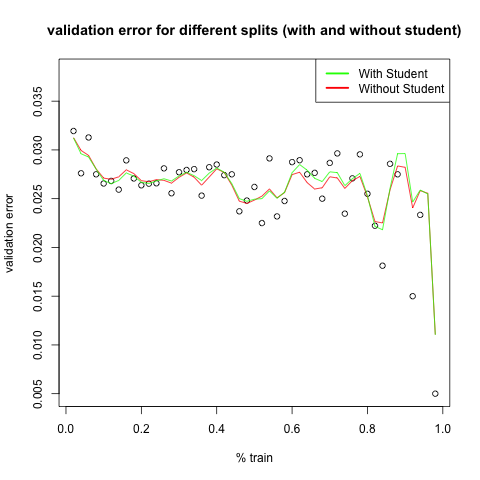

In [52]:
%%R
train.splits <- seq(.02, .98, .02)
set.seed(123)
student_dummy <- ifelse(Default$student == "Yes", 1, 0)
Default2 <- cbind(Default, student_dummy)
test.validation.student <- function(x){
    train.size <- floor(nrow(Default2) * x)
    train.ind <- sample(seq_len(nrow(Default2)), size=train.size)
    default.train <- Default2[train.ind, ]
    default.test <- Default2[-train.ind, ]
    glm.fit <- glm(default~balance + income + student_dummy, data=default.train, family=binomial)
    glm.probs <- predict(glm.fit, newdata=default.test, type="response")
    glm.pred <- ifelse(glm.probs > .5, 'Yes', 'No')
    mean(glm.pred!=default.test$default)
}

err.w.student <- sapply(train.splits, test.validation.student)
lo.w.student <- smooth.spline(train.splits, err.w.student, spar=0.36)
plot(train.splits, err.w.student, main="validation error for different splits (with and without student)", xlab="% train", ylab="validation error")
lines(lo.wo.student, col='red')
lines(lo.w.student, col='green')
legend('topright', c("With Student", "Without Student"), lty=c(1, 1), lwd=c(2.5, 2.5), col=c("green", "red"))

Adding the student dummy variable seems to change the validation error very little (in fact it looks slightly worse). If I had to guess, I would say that validation error for this problem is so low for the reasons we saw in the lecture. Namely, because the null validation rate is so low in the problem due to the structure of the dataset.

##6
###a)
Standard error:
 - balance: 2.715e-04
 - income: 5.703e-06


In [80]:
%%R
set.seed(123)
train.size <- floor(nrow(Default) * .75)
train.ind <- sample(seq_len(nrow(Default)), size=train.size)
default.train <- Default[train.ind, ]
default.test <- Default[-train.ind, ]
glm.fit <- glm(default~balance + income, data=default.train, family=binomial)
glm.summary <- summary(glm.fit)
sigmas <- glm.summary$coef[2:3, 2]

###b)

In [89]:
%%R
boot.fn <- function(dset, index){
   with(dset[index, ], {
        glm.fit <- glm(default~balance + income, family=binomial)
        sum <- summary(glm.fit)
        sum$coef[2:3, 2]
        })
}

###c)

In [98]:
%%R
require(boot)
set.seed(123)
boot.out <- boot(Default, boot.fn, R=1000)

In [99]:
%%R
boot.out


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original       bias     std. error
t1* 2.273731e-04 1.783320e-06 1.137011e-05
t2* 4.985167e-06 2.223898e-08 1.515706e-07


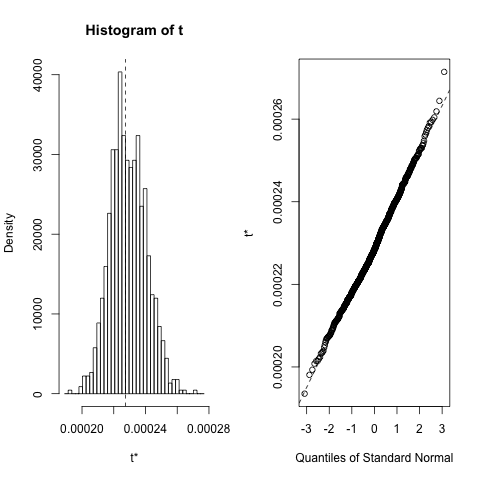

In [100]:
%%R
plot(boot.out)

###d)
The bootstrap estimates are a lot smaller that the model estimates. The book mentions that this may be due to the fact that bootstrap removes assumptions made by the standard error formula for the model, and relies instead on empirical results. 